In [1]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.37915798 0.03248826 0.68403057 ... 0.34100364 0.61120052 0.2433239 ]
 [0.06825307 0.00584828 0.12313387 ... 0.06138483 0.11002357 0.04380128]
 [0.36371182 0.03116475 0.6561645  ... 0.32711182 0.58630141 0.23341135]
 ...
 [0.16663226 0.01427793 0.3006176  ... 0.1498642  0.26861026 0.10693593]
 [0.1758675  0.01506926 0.31727868 ... 0.1581701  0.28349741 0.11286262]
 [0.23894029 0.02047367 0.43106691 ... 0.21489593 0.38517039 0.15333946]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.26356884 -0.00309418  0.76173571 ...  0.3276521   0.68056447
   0.15806098]
 [ 0.17537453  0.12039029  0.10523906 ...  0.08205708  0.09642252
  -0.25820057]
 [ 0.33058338  0.22071647  0.58075341 ...  0.4063012   0.80092993
   0.10443977]
 ...
 [ 0.1110824  -0.03422052  0.2390977  ...  0.30189445  0.30433854
   0.0145871 ]
 [ 0.07637545  0.10992878  0.19716273 ...  0.35588027  0.33896522
   0.04991677]
 [ 0.02816526  0.00238274  0.45441458 ...  0.19296962  0.20828003
   0.28

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                prior_L="point_laplace") 

 

In [5]:
mycebmf.initialize()
print(mycebmf.L[:,1])

print(mycebmf.F[:,1])

tensor([ 0.1408,  0.0467, -0.3147,  0.0523, -0.0135, -0.1213,  0.3180, -0.0440,
        -0.0097, -0.3564, -0.1941, -0.0082,  0.0084, -0.0506,  0.4083,  0.2378,
         0.2463, -0.4394,  0.0228, -0.1709,  0.2371,  0.0013, -0.2349,  0.1640,
        -0.3173,  0.0689,  0.1559,  0.1132, -0.0475, -0.0975,  0.0803,  0.0762,
         0.3808,  0.2578,  0.1108,  0.0175, -0.0894, -0.1627,  0.0673, -0.0205,
        -0.0230, -0.2953,  0.1039,  0.0084,  0.1154,  0.1599, -0.1055,  0.0982,
        -0.2414,  0.0228])
tensor([-0.0904,  0.0947,  0.0617,  0.1039,  0.1927, -0.1351, -0.1639, -0.1999,
        -0.0300,  0.0937, -0.3339, -0.2764,  0.0020, -0.0133,  0.1909,  0.0703,
         0.1803,  0.0365,  0.1411, -0.0967, -0.0327,  0.1312, -0.0889,  0.2689,
        -0.1293, -0.3763, -0.2194,  0.2866,  0.0429,  0.0732, -0.0423,  0.0523,
         0.0229,  0.1845,  0.2412,  0.1172, -0.0367, -0.0610,  0.0866,  0.1612])


In [6]:
sum(torch.outer(mycebmf.L[:,k], mycebmf.F[:,k]) for k in range(mycebmf.K))

tensor([[ 0.3396,  0.1441,  0.6862,  ...,  0.3567,  0.6402,  0.2328],
        [ 0.0331,  0.0048,  0.0887,  ...,  0.0758,  0.1093,  0.0180],
        [ 0.3695,  0.0911,  0.5955,  ...,  0.3610,  0.6105,  0.1943],
        ...,
        [ 0.0987, -0.0445,  0.2554,  ...,  0.1911,  0.2569,  0.0270],
        [ 0.1499,  0.0789,  0.2488,  ...,  0.2158,  0.2949,  0.0411],
        [ 0.2345,  0.0638,  0.4478,  ...,  0.1999,  0.3656,  0.1412]])

In [7]:
 mycebmf.L @  mycebmf.F.T

tensor([[ 0.3396,  0.1441,  0.6862,  ...,  0.3567,  0.6402,  0.2328],
        [ 0.0331,  0.0048,  0.0887,  ...,  0.0758,  0.1093,  0.0180],
        [ 0.3695,  0.0911,  0.5955,  ...,  0.3610,  0.6105,  0.1943],
        ...,
        [ 0.0987, -0.0445,  0.2554,  ...,  0.1911,  0.2569,  0.0270],
        [ 0.1499,  0.0789,  0.2488,  ...,  0.2158,  0.2949,  0.0411],
        [ 0.2345,  0.0638,  0.4478,  ...,  0.1999,  0.3656,  0.1412]])

In [8]:

k=0
f_o=mycebmf.F[:,k]
l_o=mycebmf.L[:,k]
R= noisy_matrix- mycebmf.L@mycebmf.F.T
Rk= mycebmf._partial_residual_masked(k)

print(Rk)


sum( torch.outer(mycebmf.L[:,k], mycebmf.F[:,k])   for k in range(mycebmf.K))

tensor([[ 0.2993, -0.1108,  0.7753,  ...,  0.3166,  0.6540,  0.1437],
        [ 0.2061,  0.1217,  0.1357,  ...,  0.0651,  0.0917, -0.2390],
        [ 0.3379,  0.1661,  0.6879,  ...,  0.3923,  0.8065,  0.1295],
        ...,
        [ 0.1706,  0.0257,  0.2786,  ...,  0.2564,  0.3060,  0.0797],
        [ 0.1092,  0.0487,  0.2890,  ...,  0.3083,  0.3427,  0.1152],
        [ 0.0145, -0.0401,  0.4183,  ...,  0.1964,  0.2037,  0.2727]])


tensor([[ 0.3396,  0.1441,  0.6862,  ...,  0.3567,  0.6402,  0.2328],
        [ 0.0331,  0.0048,  0.0887,  ...,  0.0758,  0.1093,  0.0180],
        [ 0.3695,  0.0911,  0.5955,  ...,  0.3610,  0.6105,  0.1943],
        ...,
        [ 0.0987, -0.0445,  0.2554,  ...,  0.1911,  0.2569,  0.0270],
        [ 0.1499,  0.0789,  0.2488,  ...,  0.2158,  0.2949,  0.0411],
        [ 0.2345,  0.0638,  0.4478,  ...,  0.1999,  0.3656,  0.1412]])

In [9]:
import torch

k = 0
Y0   = mycebmf.Y0
M    = mycebmf.mask
L    = mycebmf.L
F    = mycebmf.F

# Clone these to avoid view aliasing issues
l_old = L[:, k].clone()
f_old = F[:, k].clone()

# Baseline residual (masked)
recon = L @ F.T
R     = (Y0 - recon) * M

# Partial residual excluding factor k
Rk = (Y0 - (recon - torch.outer(l_old, f_old))) * M

# 1) First identity: Rk = R + l_old f_old^T  (masked)
print(torch.allclose(Rk, R + torch.outer(l_old, f_old) * M, atol=1e-7))

# Mutate L[:,k] --> l_new
L[:, k] = l_old + 1.0
l_new = L[:, k]  # (this is fine; we already saved l_old above)

# New residual (recompute from scratch, masked)
recon_new = L @ F.T
R_new     = (Y0 - recon_new) * M

# 2) Second identity: R_new = Rk - l_new f_old^T  (masked)
print(torch.allclose(R_new, Rk - torch.outer(l_new, f_old) * M, atol=1e-7))


True
True


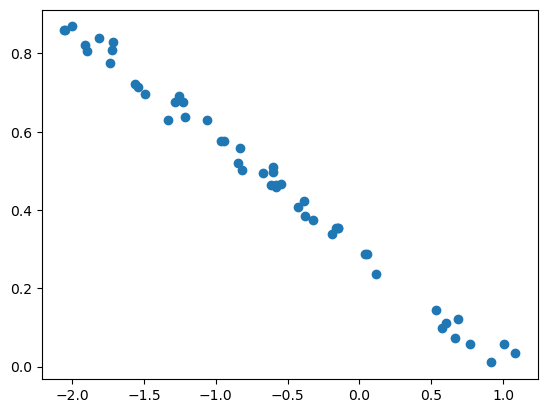

In [10]:
plt.scatter( mycebmf.L[:,0],u)

In [11]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

5


tensor([[ 0.3535,  0.0943,  0.6773,  ...,  0.3523,  0.6201,  0.2238],
        [ 0.0561,  0.0049,  0.1108,  ...,  0.0610,  0.1046,  0.0337],
        [ 0.3761,  0.0820,  0.6514,  ...,  0.3496,  0.6093,  0.2035],
        ...,
        [ 0.1357, -0.0352,  0.2849,  ...,  0.1567,  0.2557,  0.0667],
        [ 0.1640,  0.0716,  0.2951,  ...,  0.1852,  0.2930,  0.0762],
        [ 0.2238,  0.0372,  0.4215,  ...,  0.2033,  0.3596,  0.1311]])

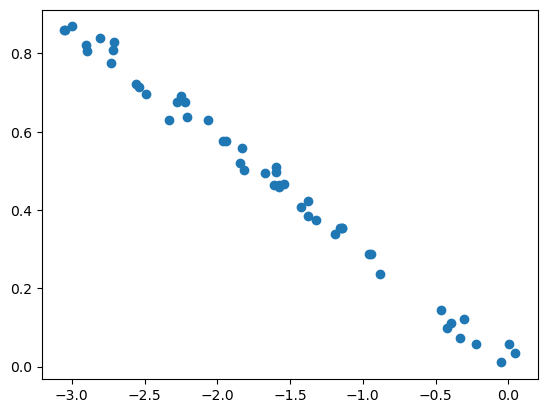

In [12]:
plt.scatter( mycebmf.L[:,0],u)

5


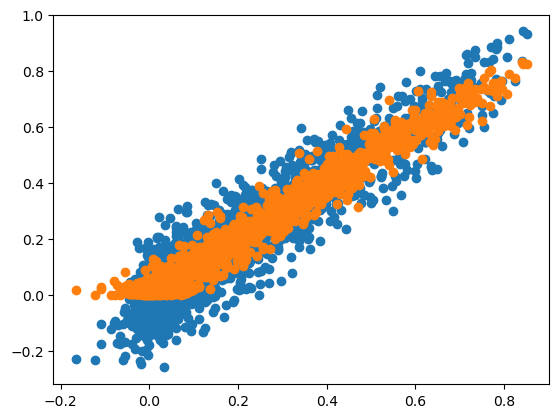

In [13]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [14]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                prior_L="point_laplace") 
mycebmf.initialize()
mycebmf.fit()

5
5
5
5
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


CEBMFResult(L=tensor([[-2.7202e+00],
        [-4.5794e-01],
        [-2.7318e+00],
        [-1.3785e+00],
        [-3.0486e+00],
        [-2.2798e+00],
        [-2.7142e+00],
        [-2.3344e+00],
        [-4.1566e-01],
        [-2.9071e+00],
        [-2.5598e+00],
        [-1.8139e+00],
        [-3.3061e-01],
        [-1.5392e+00],
        [-1.1449e+00],
        [-2.8980e+00],
        [-1.9609e+00],
        [-2.2096e+00],
        [-2.2501e+00],
        [-1.5755e+00],
        [-3.0008e+00],
        [-2.4883e+00],
        [-4.9946e-02],
        [-1.8422e+00],
        [-2.8093e+00],
        [-1.6139e+00],
        [-2.0608e+00],
        [-8.8290e-01],
        [-3.0535e+00],
        [-1.5981e+00],
        [-1.1588e+00],
        [-2.1161e-01],
        [-1.1890e+00],
        [-2.2225e+00],
        [-9.5780e-01],
        [-1.8288e+00],
        [-1.5768e+00],
        [-1.9373e+00],
        [ 4.8131e-02],
        [-3.9237e-01],
        [-1.3772e+00],
        [-9.3982e-01],
        [ 2.3444e-03

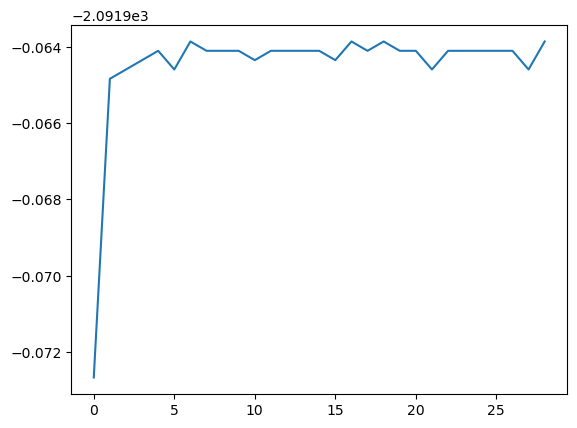

In [15]:
plt.plot(mycebmf.obj)

In [ ]:
results =[]
for i in range(50):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                      prior_L="point_laplace") 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

5
5
5
5
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
3
3
3
2
2
5
5
5
5
4
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
4
3
2
2
2
2
5
5
5
5
5
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
5
5
5
5
4
4
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
4
4
4
3
3
2
2
5
5
5
5
3
3
2
2
2
2
2
2
5
5
5
5
5
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
4
3
3
3
2
2
2
2
2
2
2
2
2
2
2
5
5
5
4
3
3
2
5
5
5
5
5
3
3
2
2
5
5
5
5
5
5
3
3
3
3
2
2
2
2
2
2
2
2
2
2
5
5
5
5
4
3
3
2
5
5
5
5
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
4
4
4
4
3
3
2
5
5
5
5
4
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
4
2
2
2
2
2
2
2
5
5
5
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
5
5
5
4
4
2
2
2
2
2


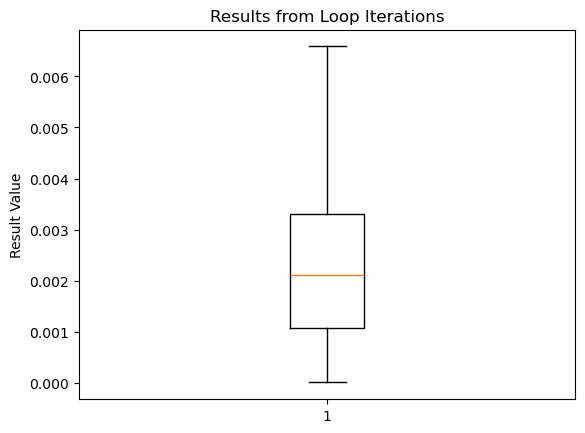

In [ ]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [ ]:
res= np.asarray(results)
np.mean(res )

0.00236293612052501